In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
data = pd.read_csv('Sheet 1-Table 1.csv')

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data1 = data.drop(['ID#'],axis=1)
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


### Hierarchical Clustering

In [6]:
data1_norm=pd.DataFrame(normalize(data1),columns=data1.columns)
data1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


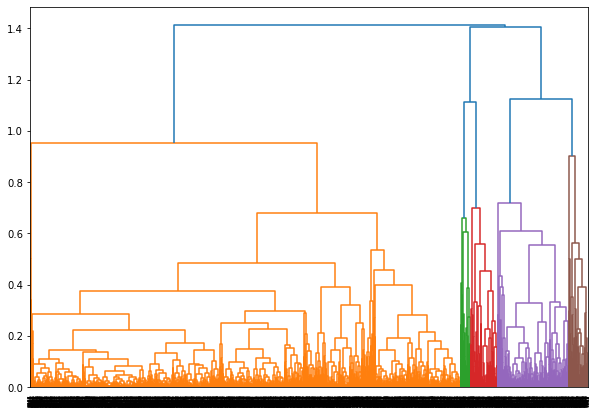

In [11]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(data1_norm,'complete'))

In [42]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [43]:
y=pd.DataFrame(hclusters.fit_predict(data1_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    2075
1    1800
2      63
3      43
4      18
Name: clustersid, dtype: int64

In [45]:
data1['clustersid']=hclusters.labels_
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [46]:
data1.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,101276.799518,251.093494,2.813012,1.000000,1.000000,27421.138313,15.320482,524.836627,1.575422,4703.515663,0.674699
1,1,38220.721111,9.431667,1.183889,1.000000,1.000000,3770.797222,6.238333,113.728333,0.383889,3429.802778,0.000000
2,2,160067.206349,573.587302,2.507937,1.000000,1.000000,42723.841270,34.142857,8148.619048,22.444444,4527.253968,0.873016
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,4,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000


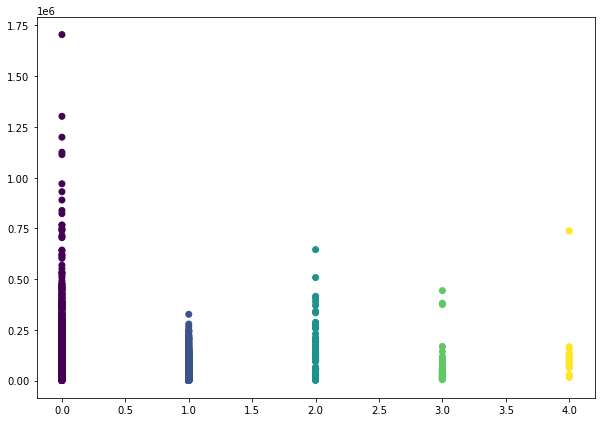

In [47]:
plt.figure(figsize=(10, 7))  
plt.scatter(data1['clustersid'],data1['Balance'], c=hclusters.labels_) 

### K means clustering

In [17]:
data1_norm=StandardScaler().fit_transform(data1)

In [18]:
clusters1=KMeans(4,random_state=30).fit(data1_norm)
clusters1

KMeans(n_clusters=4, random_state=30)

In [19]:
clusters1.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [20]:
data2=data1.copy()
data2['clusters1id']=clusters1.labels_
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters1id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [21]:
clusters1.cluster_centers_

array([[-0.29584258, -0.0603903 , -0.60911906,  0.03222463, -0.06075301,
        -0.51562007, -0.48778976, -0.18468409, -0.19727389, -0.2065444 ,
        -0.34933297],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 1.19916278,  0.8413837 ,  0.07934291,  0.15576844, -0.06276658,
         0.61091878,  1.63802866,  3.57547132,  3.86140846,  0.28565421,
         0.91563614],
       [ 0.43059508,  0.0158422 ,  1.18872871, -0.08236624, -0.05476264,
         0.91116803,  0.74463543, -0.08026444, -0.09129375,  0.37198921,
         0.57588937]])

In [22]:
data2.groupby('clusters1id').agg(['mean']).reset_index()

,clusters1id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43828.396152,97.283863,1.223007,1.019238,1.000393,4707.805654,6.926973,201.254417,0.624656,3693.855124,0.201413
1,1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
2,2,194432.643750,794.981250,2.168750,1.037500,1.000000,31897.281250,27.331250,5465.837500,16.018750,4708.400000,0.812500
3,3,117087.423649,156.736883,3.697729,1.002349,1.001566,39200.451057,18.761942,348.499608,1.029757,4885.918559,0.649961


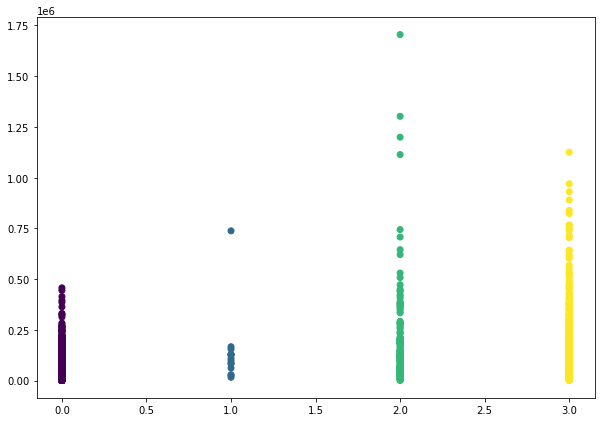

In [24]:
plt.figure(figsize=(10, 7))  
plt.scatter(data2['clusters1id'],data2['Balance'], c=clusters1.labels_) 

### For k = 6

In [26]:
data2_norm=StandardScaler().fit_transform(data2)

In [27]:
clusters2=KMeans(5,random_state=30).fit(data2_norm)
clusters2

KMeans(n_clusters=5, random_state=30)

In [28]:
clusters2.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [29]:
data3=data2.copy()
data3['clusters2id']=clusters2.labels_
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters1id,clusters2id
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [30]:
clusters2.cluster_centers_

array([[-0.29812753, -0.13091459, -0.60679077,  0.03341493, -0.06073464,
        -0.51487657, -0.48563716, -0.18638538, -0.19880253, -0.20178551,
        -0.35127322, -0.74554341],
       [ 0.43393737,  6.85291656, -0.01860659, -0.09824189, -0.06276658,
         0.07929303,  0.07322846,  0.36123467,  0.39754351, -0.11803558,
         0.35624678,  0.33400736],
       [ 0.43452947, -0.10565377,  1.1916238 , -0.08207576, -0.05461619,
         0.91461617,  0.74756025, -0.08005322, -0.08780572,  0.37596695,
         0.57904268,  1.39972033],
       [ 1.15767247,  0.4067135 ,  0.1198295 ,  0.17823194, -0.06276658,
         0.6527732 ,  1.73175761,  3.73260009,  3.99457475,  0.26854986,
         0.8953856 ,  0.68577109],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735, -0.02988616]])

In [31]:
data3.groupby('clusters2id').agg(['mean']).reset_index()

,clusters2id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters1id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43561.084490,42.843316,1.224117,1.019437,1.000397,4711.633479,6.938516,199.109877,0.619595,3701.897263,0.200714,0.000000
1,1,117326.186441,5445.305085,2.033898,1.000000,1.000000,19059.610169,12.305085,965.796610,2.881356,3874.830508,0.542373,1.508475
2,2,117385.848846,62.384248,3.700080,1.002387,1.001591,39230.949881,18.780430,347.978520,1.040573,4894.884646,0.649960,2.997613
3,3,190251.952381,458.734694,2.224490,1.040816,1.000000,32907.979592,28.231293,5685.823129,16.523810,4673.081633,0.802721,2.000000
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.000000


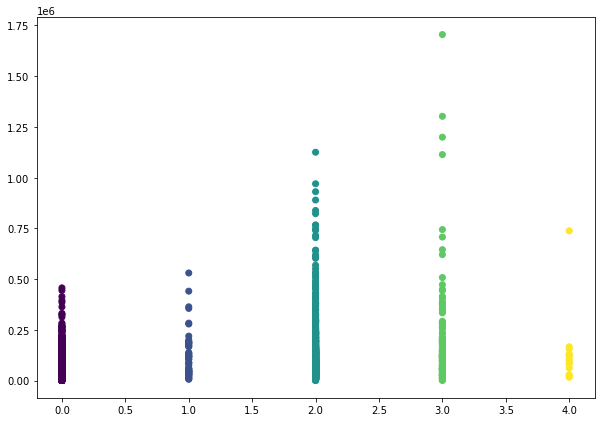

In [35]:
plt.figure(figsize=(10, 7))  
plt.scatter(data3['clusters2id'],data3['Balance'], c=clusters2.labels_)

### DBSCAN Clustering

In [36]:
data1_norm=StandardScaler().fit_transform(data)
data1_norm

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [37]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(data1_norm)

DBSCAN(eps=1, min_samples=4)

In [38]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [39]:
data['clusters']=dbscan.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [40]:
data.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1737.833052,177646.939292,899.406408,2.701518,1.062395,1.082631,39019.816189,21.784148,2120.370995,6.134907,4652.507589,0.686341
1,0,2178.729212,53148.905529,2.084023,1.660427,1.000000,1.000000,9033.232477,8.449717,116.498041,0.380932,3811.440139,0.000000
2,1,1799.892351,61006.745987,5.796034,2.605288,1.000000,1.000000,22850.425873,12.799811,245.526912,0.761095,4513.312559,1.000000
3,2,1382.750000,35251.500000,1058.750000,1.000000,1.000000,1.000000,1297.500000,1.250000,0.000000,0.000000,5047.250000,0.000000
4,3,1324.285714,65419.714286,0.000000,1.000000,1.000000,1.000000,6984.000000,11.571429,2905.571429,9.142857,5171.857143,1.000000
5,4,1363.000000,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
6,5,2557.230769,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
7,6,1830.500000,32730.750000,0.000000,1.000000,3.000000,1.000000,14267.750000,13.250000,62.500000,0.250000,4396.500000,0.000000
8,7,2672.000000,81738.000000,0.000000,1.000000,1.000000,1.000000,11860.750000,13.500000,1755.250000,9.500000,2807.250000,1.000000


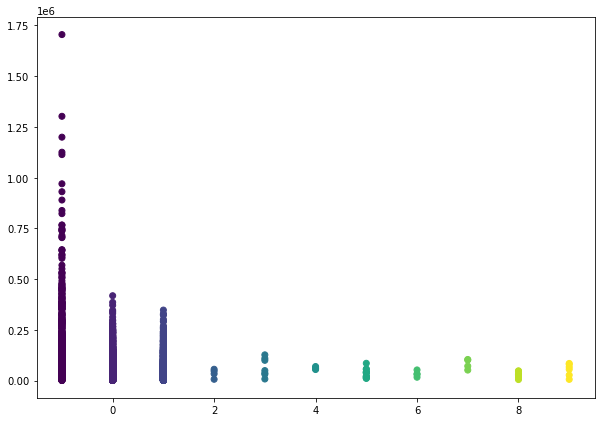

In [41]:
plt.figure(figsize=(10, 7))  
plt.scatter(data['clusters'],data['Balance'], c=dbscan.labels_) 